In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px

import matplotlib.pyplot as plt

# Matplotlib

For this excercise, we have written the following code to load the stock dataset from plotly express.

In [2]:
stocks = px.data.stocks()
stocks.head()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


## Challenge 1: 

Select a stock and create a suitable plot for it. Make sure the plot is readable with relevant information, such as date, values.  

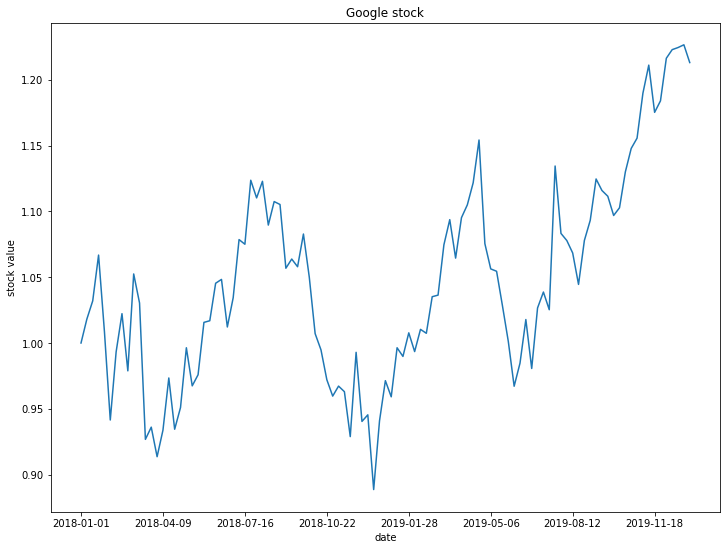

In [4]:
# YOUR CODE HERE
fig, ax = plt.subplots(figsize=(12,9))
ax.plot(stocks.date.values, stocks.GOOG.values)

x_ticks = range(0, stocks.shape[0], 14)
ax.set_xticks(x_ticks)

plt.title('Google stock')
plt.xlabel('date')
plt.ylabel('stock value')

plt.show()

## Challenge 2: 

You've already plot data from one stock. It is possible to plot multiples of them to support comparison.  
To highlight different lines, customise line styles, markers, colors and include a legend to the plot.

In [5]:
# YOUR CODE HERE

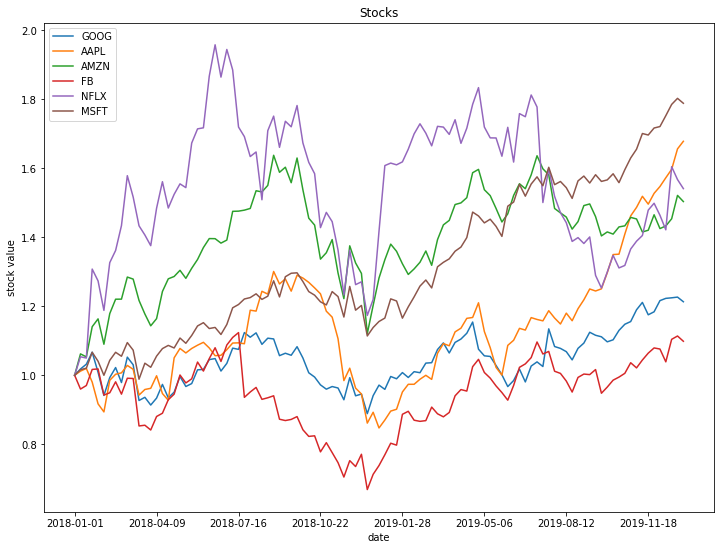

In [6]:
fig, ax = plt.subplots(figsize=(12,9))

stock_names = [st for st in stocks.columns if st != 'date']

for st in stock_names:
    ax.plot(stocks.date.values, stocks[st].values, label=st)

    x_ticks = range(0, stocks.shape[0], 14)
    ax.set_xticks(x_ticks)

plt.title('Stocks')
plt.xlabel('date')
plt.ylabel('stock value')

plt.legend()

plt.show()

# Seaborn

First, load the [tips](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv) dataset

In [7]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Challenge 3:

Now you want to explore this dataset. Pose a question and create a plot that support drawing answers for your question.

Some examples:
- (This is not supposed to be sexist) Are there differences between male and female when it comes to giving tips?
- What attribute correlate the most with tip?

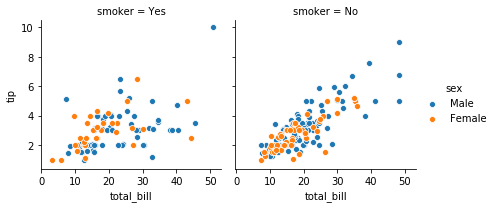

In [8]:
# YOUR CODE HERE
g = sns.FacetGrid(tips, hue='sex', col='smoker')
g.map(sns.scatterplot, 'total_bill', 'tip')
g.add_legend()
plt.show()

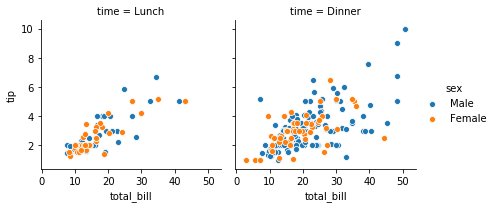

In [9]:
g = sns.FacetGrid(tips, hue='sex', col='time')
g.map(sns.scatterplot, 'total_bill', 'tip')
g.add_legend()
plt.show()

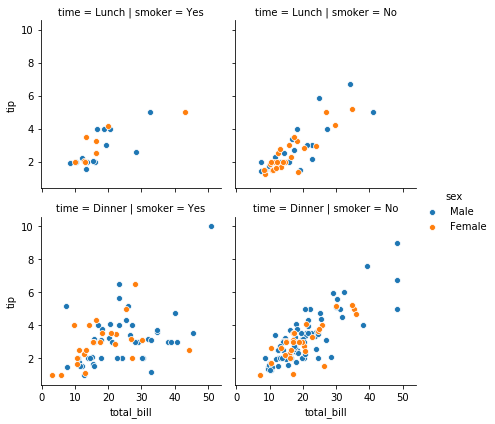

In [10]:
g = sns.FacetGrid(tips, hue='sex', col='smoker', row='time')
g.map(sns.scatterplot, 'total_bill', 'tip')
g.add_legend()
plt.show()

# Plotly Express

## Challenge 4:

Redo the above exercises with plotly express. Create diagrams which you can interact with.

In [11]:
# turn stocks dataframe into a structure that can be picked up easily with plotly express
stock_names = [st for st in stocks.columns if st != 'date']
stocks_melt = stocks.melt(id_vars=['date'], var_name='name', value_vars=stock_names)
stocks_melt.head()

,date,name,value
0,2018-01-01,GOOG,1.000000
1,2018-01-08,GOOG,1.018172
2,2018-01-15,GOOG,1.032008
3,2018-01-22,GOOG,1.066783
4,2018-01-29,GOOG,1.008773


In [12]:
px.line(stocks_melt, 'date', 'value', color='name', symbol='name')
    

In [13]:
# colors are chosen to be similar to those used by sns (for the sake of comparison)
fig = px.scatter(
    tips, x="total_bill", y="tip", 
    color="sex", color_discrete_sequence = ['#FF7F0E',
 '#1F77B4'],
    facet_col="smoker", facet_row="time")
fig.show()